# Clothes Classification with Neural Networks

In this notebook we are going to explore the Neural Networks for image classification. We are going to use the same dataset of the SVM notebook: Fashion MNIST (https://pravarmahajan.github.io/fashion/), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [24]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

scikit-learn version:  0.21.2


In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Place a seed for the random generator (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 1233407#PLACE YOUR ID
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time. Make sure that each label is present at least 10 times
in training frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [49 65 51 68 58 61 64 64 59 61]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


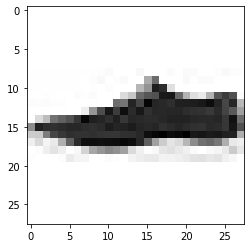

LABEL: 7
INPUT:


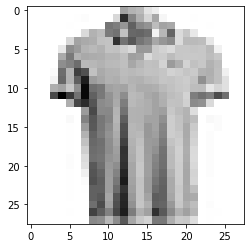

LABEL: 0
INPUT:


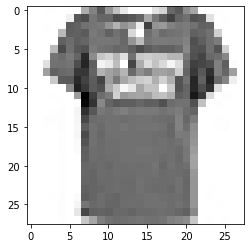

LABEL: 0


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,10000)

## TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 100. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (40,), (40,20,), (40,30,20) ]}

mlp = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

nn_classif = GridSearchCV(estimator =  mlp, cv = 5, param_grid = parameters )
nn_classif.fit(X_train, y_train)

/home/andrea/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.1, max_iter=300,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=1233407, shuffle=True,
                                     solver='sgd', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'hidden_layer_sizes': [(10,), (20,), (40,

In [9]:
print ('RESULTS FOR NN\n')

print("Best parameters set found:",  nn_classif.best_params_ )
print("Score with best parameters:", nn_classif.best_score_)
best_hidd_lay_size = nn_classif.best_params_.get('hidden_layer_sizes')
print("\nAll scores on the grid:")
scores = pd.DataFrame(nn_classif.cv_results_)[['rank_test_score','param_hidden_layer_sizes','mean_test_score',
                                               'std_test_score', 'mean_fit_time','std_fit_time',
                                               'mean_score_time','std_score_time']]
scores.sort_values('rank_test_score')

RESULTS FOR NN

Best parameters set found: {'hidden_layer_sizes': (40,)}
Score with best parameters: 0.79

All scores on the grid:


,rank_test_score,param_hidden_layer_sizes,mean_test_score,std_test_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time
2,1,"(40,)",0.790,0.027605,0.904367,0.213923,0.000853,0.000115
1,2,"(20,)",0.785,0.037425,0.837711,0.116331,0.000736,0.000128
0,3,"(10,)",0.755,0.015164,0.794868,0.215859,0.000611,0.000035
3,4,"(40, 20)",0.710,0.094894,0.647958,0.354298,0.001435,0.000122
4,5,"(40, 30, 20)",0.640,0.096599,0.451717,0.119570,0.001160,0.000200


### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [10]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 32, 480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)
mlp_kf = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd', 
                         hidden_layer_sizes = best_hidd_lay_size,
                         tol=1e-4, random_state=ID,
                         learning_rate_init=.1)

# recall to use cv=kf in GridSearchCV parameters to use the k-fold subdivision seen in the lectures
kf_classif = GridSearchCV(estimator =  mlp_kf, cv = kf, param_grid = parameters )
kf_classif.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(40,),
                                     learning_rate='constant',
                                     learning_rate_init=0.1, max_iter=300,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=1233407, shuffle=True,
                                     solver='sgd', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None, para

In [11]:
print ('RESULTS FOR NN\n')

print("Best parameters set found:",  kf_classif.best_params_ )
best_batch_size =  kf_classif.best_params_.get('batch_size')
print("Score with best parameters:", kf_classif.best_score_)
print("\nAll scores on the grid:")
scores = pd.DataFrame(kf_classif.cv_results_)[['rank_test_score','param_batch_size','mean_test_score',
                                               'std_test_score', 'mean_fit_time','std_fit_time',
                                               'mean_score_time','std_score_time']]
scores.sort_values('rank_test_score')

RESULTS FOR NN

Best parameters set found: {'batch_size': 480}
Score with best parameters: 0.7533333333333333

All scores on the grid:


,rank_test_score,param_batch_size,mean_test_score,std_test_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time
2,1,480,0.753333,0.012472,0.622210,0.218639,0.000828,0.000027
1,2,32,0.741667,0.024721,0.851927,0.303640,0.000849,0.000092
0,3,1,0.101667,0.030000,16.785777,5.137413,0.000950,0.000143


### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## [ANSWER TO QUESTION 1]

### TO DO 3

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate . 

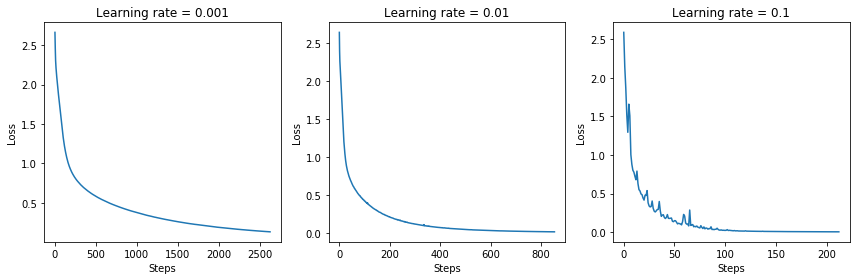

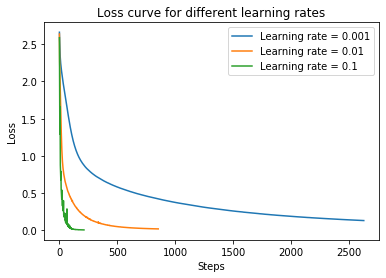

In [12]:
import matplotlib.pyplot as plt

lr_list = [10**exp for exp in range(-3,0)]
loss_curves = []

fig = plt.figure(figsize=(12,4))

for lr, index in zip(lr_list, range(3)):
    mlp_lr = MLPClassifier(max_iter= 10000, alpha=1e-4, solver='sgd', 
                         hidden_layer_sizes = best_hidd_lay_size,
                         batch_size = best_batch_size,
                         tol=1e-4, random_state=ID,
                         learning_rate_init = lr)
    mlp_lr.fit(X_train, y_train)
    ax = fig.add_subplot(1,3,index+1)
    ax.set_title("Learning rate = "+str(lr))
    ax.set_xlabel("Steps")
    ax.set_ylabel("Loss")
    ax.plot(mlp_lr.loss_curve_)
    loss_curves.append(mlp_lr.loss_curve_)
    
plt.tight_layout()
plt.show()

for lr, loss_c in zip(lr_list, loss_curves):
    plt.plot(loss_c, label = "Learning rate = "+str(lr))
    
plt.title("Loss curve for different learning rates")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [13]:
parameters = {'learning_rate_init': [0.1, 0.01, 0.001]}

mlp_lr = MLPClassifier(max_iter= 10000, alpha=1e-4, solver='sgd', 
                       hidden_layer_sizes = best_hidd_lay_size,
                       batch_size = best_batch_size,
                       tol=1e-4, random_state=ID )
lr_classif = GridSearchCV(estimator =  mlp_lr, cv = kf, param_grid = parameters )
lr_classif.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:",  lr_classif.best_params_ )
best_lr =  lr_classif.best_params_.get('learning_rate_init')
print("Score with best parameters:", lr_classif.best_score_)
print("\nAll scores on the grid:")
scores = pd.DataFrame(lr_classif.cv_results_)[['rank_test_score','param_learning_rate_init','mean_test_score',
                                               'std_test_score', 'mean_fit_time','std_fit_time',
                                               'mean_score_time','std_score_time']]
scores.sort_values('rank_test_score')

RESULTS FOR NN

Best parameters set found: {'learning_rate_init': 0.01}
Score with best parameters: 0.7783333333333333

All scores on the grid:


,rank_test_score,param_learning_rate_init,mean_test_score,std_test_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time
1,1,0.01,0.778333,0.044597,3.981575,0.092481,0.000841,0.000021
2,2,0.001,0.771667,0.038224,12.726641,0.605959,0.000847,0.000021
0,3,0.1,0.753333,0.012472,0.678699,0.231206,0.000931,0.000090


### QUESTION 2

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

## [ANSWER TO QUESTION 2]

### TO DO 4

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate)from above. Plot the learning curve also for this case.


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.212677


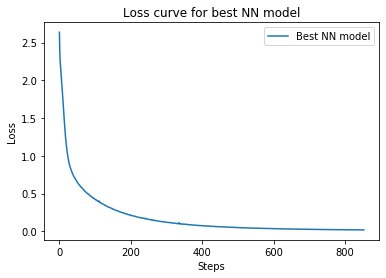

In [14]:
#get training and test error for the best NN model from CV
mlp_best = MLPClassifier(max_iter= 10000, alpha=1e-4, solver='sgd', 
                       hidden_layer_sizes = best_hidd_lay_size,
                       batch_size = best_batch_size,
                       tol=1e-4, random_state=ID,
                       learning_rate_init = best_lr)
mlp_best.fit(X_train,y_train)

training_error = 1. - mlp_best.score(X_train,y_train)
test_error = 1. - mlp_best.score(X_test,y_test)

print ('\nRESULTS FOR BEST NN\n')
print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

plt.plot(mlp_best.loss_curve_, label = "Best NN model")
plt.title("Loss curve for best NN model")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.legend()
plt.show()

## More data 
Now let's do the same but using 5000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer !!

In [15]:
X = X[permutation]
y = y[permutation]

m_training = 5000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [497 525 520 493 484 501 496 502 500 482]


## TO DO 5

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [16]:
# use best architecture and params from before

mlp_best_large = MLPClassifier(max_iter= 10000, alpha=1e-4, solver='sgd', 
                       hidden_layer_sizes = best_hidd_lay_size,
                       batch_size = best_batch_size,
                       tol=1e-4, random_state=ID,
                       learning_rate_init = best_lr,
                       verbose=True)
mlp_best_large.fit(X_train,y_train)

training_error_large = 1. - mlp_best_large.score(X_train,y_train)
test_error_large = 1. - mlp_best_large.score(X_test,y_test)

Iteration 1, loss = 2.28625584
Iteration 2, loss = 1.89966959
Iteration 3, loss = 1.51821037
Iteration 4, loss = 1.17841333
Iteration 5, loss = 0.98252818
Iteration 6, loss = 0.87460357
Iteration 7, loss = 0.80937218
Iteration 8, loss = 0.76109795
Iteration 9, loss = 0.72503077
Iteration 10, loss = 0.69507722
Iteration 11, loss = 0.67244562
Iteration 12, loss = 0.64984533
Iteration 13, loss = 0.63251443
Iteration 14, loss = 0.61656378
Iteration 15, loss = 0.60266931
Iteration 16, loss = 0.59108794
Iteration 17, loss = 0.57928442
Iteration 18, loss = 0.56878105
Iteration 19, loss = 0.55979889
Iteration 20, loss = 0.55067294
Iteration 21, loss = 0.54279636
Iteration 22, loss = 0.53487953
Iteration 23, loss = 0.52639487
Iteration 24, loss = 0.52263561
Iteration 25, loss = 0.51471854
Iteration 26, loss = 0.51070138
Iteration 27, loss = 0.50431362
Iteration 28, loss = 0.49875759
Iteration 29, loss = 0.49397307
Iteration 30, loss = 0.49112057
Iteration 31, loss = 0.48651570
Iteration 32, los

Iteration 253, loss = 0.18953199
Iteration 254, loss = 0.19120124
Iteration 255, loss = 0.18927672
Iteration 256, loss = 0.18789534
Iteration 257, loss = 0.18656854
Iteration 258, loss = 0.18687118
Iteration 259, loss = 0.18390069
Iteration 260, loss = 0.18511819
Iteration 261, loss = 0.18473671
Iteration 262, loss = 0.18337267
Iteration 263, loss = 0.18145562
Iteration 264, loss = 0.18549010
Iteration 265, loss = 0.18076631
Iteration 266, loss = 0.18227839
Iteration 267, loss = 0.18208932
Iteration 268, loss = 0.17874142
Iteration 269, loss = 0.17825848
Iteration 270, loss = 0.18041123
Iteration 271, loss = 0.17824822
Iteration 272, loss = 0.17899231
Iteration 273, loss = 0.17494055
Iteration 274, loss = 0.17543201
Iteration 275, loss = 0.17382175
Iteration 276, loss = 0.17547783
Iteration 277, loss = 0.17322062
Iteration 278, loss = 0.17450882
Iteration 279, loss = 0.17176686
Iteration 280, loss = 0.17159613
Iteration 281, loss = 0.17078072
Iteration 282, loss = 0.17120624
Iteration 

Iteration 506, loss = 0.07677903
Iteration 507, loss = 0.07648105
Iteration 508, loss = 0.07657674
Iteration 509, loss = 0.07726187
Iteration 510, loss = 0.07686411
Iteration 511, loss = 0.07605475
Iteration 512, loss = 0.07657435
Iteration 513, loss = 0.07504720
Iteration 514, loss = 0.07359423
Iteration 515, loss = 0.07364557
Iteration 516, loss = 0.07356544
Iteration 517, loss = 0.07308800
Iteration 518, loss = 0.07402761
Iteration 519, loss = 0.07318488
Iteration 520, loss = 0.07311313
Iteration 521, loss = 0.07507310
Iteration 522, loss = 0.07334540
Iteration 523, loss = 0.07207599
Iteration 524, loss = 0.07212119
Iteration 525, loss = 0.07243605
Iteration 526, loss = 0.07039265
Iteration 527, loss = 0.07195332
Iteration 528, loss = 0.07068899
Iteration 529, loss = 0.07064915
Iteration 530, loss = 0.06969155
Iteration 531, loss = 0.07017323
Iteration 532, loss = 0.06969776
Iteration 533, loss = 0.06971557
Iteration 534, loss = 0.07295379
Iteration 535, loss = 0.07107931
Iteration 

Iteration 757, loss = 0.03543539
Iteration 758, loss = 0.03788907
Iteration 759, loss = 0.03591450
Iteration 760, loss = 0.03610216
Iteration 761, loss = 0.03510155
Iteration 762, loss = 0.03528595
Iteration 763, loss = 0.03589874
Iteration 764, loss = 0.03479609
Iteration 765, loss = 0.03491478
Iteration 766, loss = 0.03502645
Iteration 767, loss = 0.03447879
Iteration 768, loss = 0.03551133
Iteration 769, loss = 0.03445435
Iteration 770, loss = 0.03463452
Iteration 771, loss = 0.03451495
Iteration 772, loss = 0.03469172
Iteration 773, loss = 0.03436794
Iteration 774, loss = 0.03358552
Iteration 775, loss = 0.03446665
Iteration 776, loss = 0.03367538
Iteration 777, loss = 0.03327375
Iteration 778, loss = 0.03370654
Iteration 779, loss = 0.03401131
Iteration 780, loss = 0.03401378
Iteration 781, loss = 0.03353199
Iteration 782, loss = 0.03334974
Iteration 783, loss = 0.03398486
Iteration 784, loss = 0.03380812
Iteration 785, loss = 0.03316063
Iteration 786, loss = 0.03375890
Iteration 

In [17]:
print ('RESULTS FOR NN\n')
print ("NN training error: %f" % training_error_large)
print ("NN test error: %f" % test_error_large)

RESULTS FOR NN

NN training error: 0.001800
NN test error: 0.174091


## QUESTION 3
Compare the train and test errors you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

## [ANSWER TO QUESTION 3]

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=5000 training data points.

INPUT:


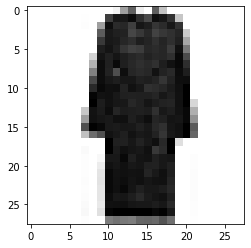

LABEL: 4
29299  index was not correctly classified by NN with smaller dataset and now is correctly classified by NN with larger dataset.


In [18]:
NN_prediction = mlp_best.predict(X_test)
large_NN_prediction = mlp_best_large.predict(X_test)

miscl_samples = [i for i in range(len(NN_prediction)) if (NN_prediction[i] != large_NN_prediction[i]) and (large_NN_prediction[i] == y_test[i]) ]

rand = np.random.choice(miscl_samples)
plot_input(X_test,y_test,rand)

print(rand, " index was not correctly classified by NN with smaller dataset and now is correctly classified by NN with larger dataset.")
        

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 5000 data points. The code is already provided, just fix variable names (e.g., replace mlp ,  mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


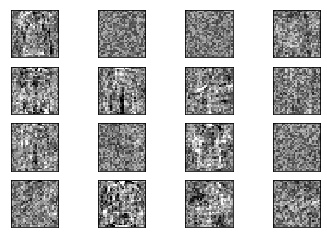

Weights with 5000 data points:


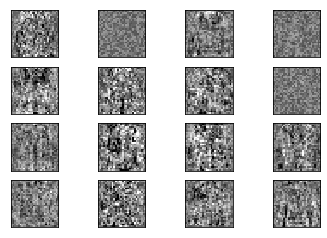

In [19]:
# The code is already provided, fix variable names in order to have it working with your implementation

print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_best.coefs_[0].min(), mlp_best.coefs_[0].max()
for coef, ax in zip(mlp_best.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 5000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_best_large.coefs_[0].min(), mlp_best_large.coefs_[0].max()
for coef, ax in zip(mlp_best_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 4

Describe what do you observe by looking at the weights

## [ANSWER TO QUESTION 4]

### TO DO 9

Report the best SVM model and its parameters, you found in the last notebook (or check out the solution on the moodle webpage of the course). Fit it on a few data points and compute its training and test scores.

In [20]:
# use best parameters found in the SVM notebook, create SVM and perform fitting

best_SVM = SVC(kernel = 'rbf', C = 50, gamma = 0.005)
best_SVM.fit(X_train, y_train)
SVM_prediction = best_SVM.predict(X_test)

SVM_training_error = 1. - best_SVM.score(X_train,y_train)
SVM_test_error = 1. - best_SVM.score(X_test,y_test)

In [21]:
print('RESULTS FOR SVM')
print("Training error SVM:", SVM_training_error)
print("Test error SVM:", SVM_test_error)

print('\nRESULTS FOR NN (larger dataset)')
print("NN training error:", training_error_large)
print("NN test error:", test_error_large )

print('\nRESULTS FOR NN (smaller dataset)')
print("NN training error:", training_error)
print("NN test error:", test_error )

RESULTS FOR SVM
Training error SVM: 0.0030000000000000027
Test error SVM: 0.1472181818181818

RESULTS FOR NN (larger dataset)
NN training error: 0.0018000000000000238
NN test error: 0.17409090909090907

RESULTS FOR NN (smaller dataset)
NN training error: 0.0
NN test error: 0.2126767676767677



 Confusion matrix SVM


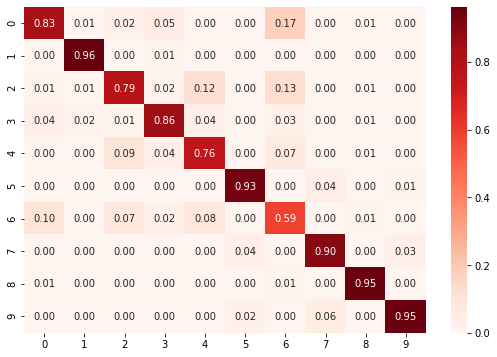


 Confusion matrix NN (smaller dataset)


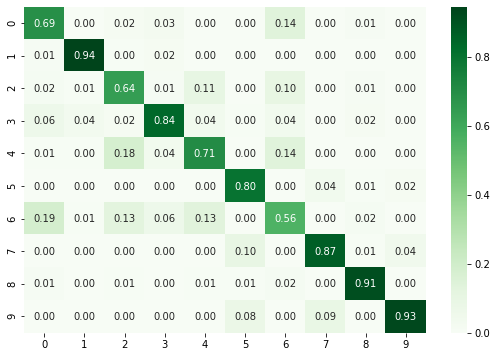


 Confusion matrix NN (larger dataset)


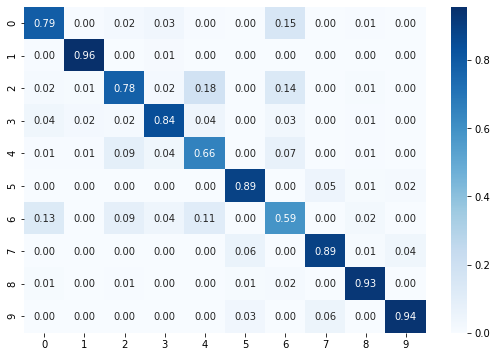

In [26]:
import sklearn.metrics as skm

u, counts = np.unique(y_test, return_counts=True)
confusion_SVM = skm.confusion_matrix( SVM_prediction, y_test)
confusion_NN = skm.confusion_matrix( NN_prediction, y_test)
confusion_NN_large = skm.confusion_matrix( large_NN_prediction, y_test)

print("\n Confusion matrix SVM")
plt.figure(figsize = (9,6))
sns.heatmap(confusion_SVM/counts[:,None], annot=True, fmt = "1.2f" , cmap="Reds" )
plt.show()

print("\n Confusion matrix NN (smaller dataset)")
plt.figure(figsize = (9,6))
sns.heatmap(confusion_NN/counts[:,None], annot=True, fmt =  "1.2f" , cmap="Greens" )
plt.show()

print("\n Confusion matrix NN (larger dataset)")
plt.figure(figsize = (9,6))
sns.heatmap(confusion_NN_large/counts[:,None], annot=True, fmt =  "1.2f" , cmap="Blues" )
plt.show()

## QUESTION 5
Compare the results of SVM and of NN. Which one would you prefer? 

## [ANSWER TO QUESTION 5]